In [8]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

In [15]:
khz = 1000.0

def lpf(t,x,tc,inp):
    dx = [0]*len(x)
    dx[0] = tc*inp - tc*x[0]
    for i in range(1,len(x)):
        dx[i] = tc*x[i-1]-tc*x[i]
    
    return dx


In [19]:

def sine(freq,phase,ampl,t):
    return ampl*np.sin(freq*t+phase)

In [82]:
print("low pass filter")
def step_lpf(x,t):
    inp =sine(8*khz,0,1.0,t)
    cutoff = 2*khz
    tc = 2*np.pi*cutoff
    return lpf(t,x,tc,inp)
 
nlayers = 4
y0 = [0]*nlayers
t = np.arange(0, 0.01, 1.0/(44.1*khz))
sol = odeint(step_lpf, y0, t)

(441, 4)


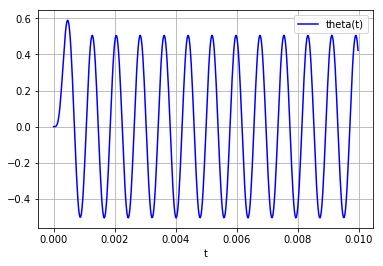

In [83]:

print(sol.shape)
plt.plot(t, sol[:, nlayers-1], 'b', label='theta(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

In [124]:
print("band pass filter")
def step_bpf(x,t):
    inp =sine(100*khz,0,1.0,t)
    cutoff_lo = 2*khz
    cutoff_hi = 8*khz
    tc_lo = 2*np.pi*cutoff_lo
    tc_hi = 2*np.pi*cutoff_hi
    half = int(len(x)/2)
    upper = lpf(t,x[0:half],tc_hi,inp)
    lower = lpf(t,x[half:],tc_lo,inp)
    assert(len(upper) == len(lower))
    return upper+lower

nlayers = 8
y0 = [0]*(nlayers*2)
t = np.arange(0, 0.01, 1.0/(44.1*khz))
sol = odeint(step_bpf, y0, t)

band pass filter


(441, 16)


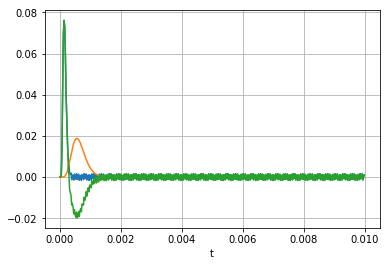

In [125]:

print(sol.shape)
plt.plot(t, sol[:, nlayers-1])
plt.plot(t, sol[:, nlayers*2-1])
plt.plot(t, sol[:, nlayers-1]-sol[:,nlayers*2-1])
plt.xlabel('t')
plt.grid()
plt.show()